# 🚀 Optimized Stock Price Prediction for Low-Spec Computers
## Reduced Context Window (30) + Smaller Dataset + Memory Optimization

**Optimizations for your computer:**
- ✅ Context window: 30 (instead of 60)
- ✅ Data range: 2 years (instead of 4)
- ✅ Epochs: 50 (instead of 200)
- ✅ Smaller model architecture
- ✅ Memory optimization
- ✅ Disabled attention mechanism
- ✅ Reduced early stopping patience

In [2]:
# Enhanced Imports and Configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# MEMORY OPTIMIZATION FOR LOW-SPEC COMPUTERS
import gc
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print('💾 Memory optimization enabled for low-spec computers')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Configuration - OPTIMIZED FOR LOW-SPEC COMPUTER
STOCK_SYMBOL = 'RELIANCE.NS'
START_DATE = '2022-01-01'  # Reduced data range (2 years instead of 4)
END_DATE = '2024-01-01'
SEQUENCE_LENGTH = 30       # Reduced from 60 to 30
EPOCHS = 50               # Reduced from 200 to 50
LEARNING_RATE = 0.001
DROPOUT = 0.3
HIDDEN_SIZE = 64          # Reduced from 128 to 64
NUM_LAYERS = 2            # Reduced from 3 to 2

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'🔧 Using device: {device}')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print('Optimized Stock Prediction System Initialized!')
print(f' Target Stock: {STOCK_SYMBOL}')
print(f' Date Range: {START_DATE} to {END_DATE}')
print(f'Sequence Length: {SEQUENCE_LENGTH} days (reduced for performance)')
print(f'Epochs: {EPOCHS} (reduced for faster training)')
print(f' Model Size: Smaller architecture for low-spec computers')

💾 Memory optimization enabled for low-spec computers
🔧 Using device: cpu
Optimized Stock Prediction System Initialized!
 Target Stock: RELIANCE.NS
 Date Range: 2022-01-01 to 2024-01-01
Sequence Length: 30 days (reduced for performance)
Epochs: 50 (reduced for faster training)
 Model Size: Smaller architecture for low-spec computers


In [3]:
# Enhanced Data Download Function
def get_stock_data(symbol, start_date, end_date):
    """Download and validate stock data"""
    try:
        print(f' Downloading data for {symbol}...')
        ticker = yf.Ticker(symbol)
        data = ticker.history(start=start_date, end=end_date)
        
        if data.empty:
            print(f' No data found for {symbol}')
            return None
            
        # Clean data
        data = data.dropna()
        
        print(f' Successfully downloaded {len(data)} trading days')
        return data
        
    except Exception as e:
        print(f' Error downloading data: {e}')
        return None

# Download stock data
df = get_stock_data(STOCK_SYMBOL, START_DATE, END_DATE)

if df is not None:
    print(f' Data shape: {df.shape}')
    print(f' Date range: {df.index[0].strftime("%Y-%m-%d")} to {df.index[-1].strftime("%Y-%m-%d")}')
    print('\n First 5 rows:')
    display(df.head())
    print('\n Data info:')
    print(df.info())
else:
    print(' Failed to download data')

 Successfully downloaded 493 trading days
 Data shape: (493, 7)
 Date range: 2022-01-03 to 2023-12-29

 First 5 rows:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00+05:30,1091.447144,1111.268555,1090.777954,1109.376343,5421611,0.0,0.0
2022-01-04 00:00:00+05:30,1114.937500,1135.751099,1109.445557,1134.412720,10847728,0.0,0.0
2022-01-05 00:00:00+05:30,1136.212646,1143.135132,1122.806030,1139.719971,11643813,0.0,0.0
2022-01-06 00:00:00+05:30,1131.228394,1132.520630,1111.753052,1115.214355,14447422,0.0,0.0
2022-01-07 00:00:00+05:30,1121.883057,1134.389648,1112.929932,1124.213623,13112115,0.0,0.0



 Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2022-01-03 00:00:00+05:30 to 2023-12-29 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          493 non-null    float64
 1   High          493 non-null    float64
 2   Low           493 non-null    float64
 3   Close         493 non-null    float64
 4   Volume        493 non-null    int64  
 5   Dividends     493 non-null    float64
 6   Stock Splits  493 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 30.8 KB
None


In [4]:
# Simplified Technical Indicators (Reduced for Performance)
def add_basic_technical_indicators(df):
    """Add essential technical indicators - optimized for low-spec computers"""
    data = df.copy()
    
    # Moving averages (reduced windows)
    data['SMA_5'] = data['Close'].rolling(window=5).mean()
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['EMA_5'] = data['Close'].ewm(span=5).mean()
    data['EMA_10'] = data['Close'].ewm(span=10).mean()
    
    # RSI (simplified)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # Price ratios
    data['High_Low_Ratio'] = data['High'] / data['Low']
    data['Close_Open_Ratio'] = data['Close'] / data['Open']
    
    # Volume indicators
    data['Volume_SMA'] = data['Volume'].rolling(window=10).mean()
    data['Volume_Ratio'] = data['Volume'] / data['Volume_SMA']
    
    # Clean data
    data = data.dropna()
    
    print(f' Added {len(data.columns)} basic technical indicators')
    return data

# Apply basic technical indicators
print(' Applying basic technical indicators...')
df_enhanced = add_basic_technical_indicators(df)
print(f' Original data shape: {df.shape}')
print(f' Enhanced data shape: {df_enhanced.shape}')
print(f' Total features: {len(df_enhanced.columns)} indicators')
print(f' Features: {df_enhanced.columns.tolist()}')

 Applying basic technical indicators...
 Added 16 basic technical indicators
 Original data shape: (493, 7)
 Enhanced data shape: (480, 16)
 Total features: 16 indicators
 Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI', 'High_Low_Ratio', 'Close_Open_Ratio', 'Volume_SMA', 'Volume_Ratio']


In [5]:
# Memory cleanup
gc.collect()
print(' Memory cleanup completed')

# Enhanced Data Preprocessing for LSTM
print(' Preparing data for LSTM training...')

# Use enhanced data with technical indicators
data = df_enhanced.values

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(f' Enhanced data shape: {data.shape}')
print(f' Scaled data shape: {scaled_data.shape}')
print(f' Features used: {len(df_enhanced.columns)} technical indicators')
print(f' Close price range: {df_enhanced["Close"].min():.2f} to {df_enhanced["Close"].max():.2f}')

# Enhanced Sequence Creation
def create_sequences(data, sequence_length):
    """Create sequences for LSTM training with multiple features"""
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])  # All features for sequence
        y.append(data[i, 3])  # Close price is 4th column (target)
    return np.array(X), np.array(y)

# Create sequences
print(f' Creating sequences with {SEQUENCE_LENGTH} time steps...')
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)

print(f' Sequences created:')
print(f' X shape: {X.shape} (samples, time_steps, features)')
print(f' y shape: {y.shape} (samples,)')
print(f' Features per time step: {X.shape[2]}')
print(f' Total training samples: {X.shape[0]}')

# Train/Test Split
train_size = int(0.8 * len(X))
X_train = torch.from_numpy(X[:train_size]).float().to(device)
y_train = torch.from_numpy(y[:train_size]).float().to(device)
X_test = torch.from_numpy(X[train_size:]).float().to(device)
y_test = torch.from_numpy(y[train_size:]).float().to(device)

print(f' Data split completed:')
print(f' Training data - X: {X_train.shape}, y: {y_train.shape}')
print(f' Test data - X: {X_test.shape}, y: {y_test.shape}')
print(f' Features per sample: {X_train.shape[2]}')
print(f' Ready for LSTM training!')

# Memory cleanup
del X, y, data, scaled_data
gc.collect()
print(' Memory cleanup after data preparation')

 Memory cleanup completed
 Preparing data for LSTM training...
 Enhanced data shape: (480, 16)
 Scaled data shape: (480, 16)
 Features used: 16 technical indicators
 Close price range: 1015.88 to 1311.51
 Creating sequences with 30 time steps...
 Sequences created:
 X shape: (450, 30, 16) (samples, time_steps, features)
 y shape: (450,) (samples,)
 Features per time step: 16
 Total training samples: 450
 Data split completed:
 Training data - X: torch.Size([360, 30, 16]), y: torch.Size([360])
 Test data - X: torch.Size([90, 30, 16]), y: torch.Size([90])
 Features per sample: 16
 Ready for LSTM training!
 Memory cleanup after data preparation


In [7]:
# 🚀 Optimized LSTM Model for Low-Spec Computers
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import gc

print("🚀 Starting Optimized LSTM Training...")
print("=" * 50)

# Optimized LSTM Model for Low-Spec Computers
class OptimizedStockLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2, output_dim=1, dropout=0.3):
        super(OptimizedStockLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # LSTM layers (simplified architecture)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Output layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)
        
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)
    
    def forward(self, x):
        batch_size = x.size(0)
        
        # Initialize hidden states
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(x.device)
        
        # LSTM forward pass
        lstm_out, _ = self.lstm(x, (h0, c0))
        
        # Take the last time step
        lstm_out = lstm_out[:, -1, :]
        
        # Apply dropout
        lstm_out = self.dropout(lstm_out)
        
        # Final prediction
        output = self.fc(lstm_out)
        
        return output

# Create Optimized LSTM Model
input_features = X_train.shape[2]
model = OptimizedStockLSTM(
    input_dim=input_features,
    hidden_dim=HIDDEN_SIZE,  # 64 instead of 128
    num_layers=NUM_LAYERS,   # 2 instead of 3
    output_dim=1,
    dropout=DROPOUT
).to(device)

# Model summary
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'🧠 Optimized LSTM Model Created:')
print(f'📊 Input features: {input_features} technical indicators')
print(f'🔢 Total parameters: {total_params:,}')
print(f'🎯 Trainable parameters: {trainable_params:,}')
print(f'💾 Model size: {total_params * 4 / 1024 / 1024:.2f} MB')
print(f'⚡ Architecture: Optimized for low-spec computers')
print(f'🚀 Ready for training!')

🚀 Starting Optimized LSTM Training...
🧠 Optimized LSTM Model Created:
📊 Input features: 16 technical indicators
🔢 Total parameters: 54,337
🎯 Trainable parameters: 54,337
💾 Model size: 0.21 MB
⚡ Architecture: Optimized for low-spec computers
🚀 Ready for training!


In [8]:
# Training Setup - Optimized for Performance
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Simple Early Stopping
class SimpleEarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.best_weights = None
    
    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_weights = model.state_dict().copy()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                if self.best_weights:
                    model.load_state_dict(self.best_weights)
                return True
        return False

early_stopping = SimpleEarlyStopping(patience=10)
print('⚙️ Training setup complete:')
print(f'🎯 Optimizer: Adam')
print(f'📉 Scheduler: ReduceLROnPlateau')
print(f'⏹️ Early stopping: 10 patience (reduced for faster training)')

⚙️ Training setup complete:
🎯 Optimizer: Adam
📉 Scheduler: ReduceLROnPlateau
⏹️ Early stopping: 10 patience (reduced for faster training)


In [9]:
# Optimized Training Loop
train_losses = []
val_losses = []

# Split training data for validation
val_size = int(0.2 * len(X_train))
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train_split = X_train[:-val_size]
y_train_split = y_train[:-val_size]

print('🚀 Starting optimized training...')
print(f'🏋️ Training samples: {len(X_train_split)}')
print(f'🧪 Validation samples: {len(X_val)}')
print(f'⏱️ Max epochs: {EPOCHS}')

for epoch in range(EPOCHS):
    # Training phase
    model.train()
    
    # Forward pass
    y_pred = model(X_train_split)
    loss = criterion(y_pred.squeeze(), y_train_split)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Gradient clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    optimizer.step()
    train_loss = loss.item()
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred.squeeze(), y_val).item()
    
    # Store losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Learning rate scheduling
    scheduler.step(val_loss)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}]')
        print(f'  🏋️ Train Loss: {train_loss:.6f}')
        print(f'  🧪 Val Loss: {val_loss:.6f}')
        print(f'  📉 Learning Rate: {optimizer.param_groups[0]["lr"]:.8f}')
    
    # Early stopping
    if early_stopping(val_loss, model):
        print(f'⏹️ Early stopping at epoch {epoch+1}')
        print(f'🎯 Best validation loss: {early_stopping.best_loss:.6f}')
        break
    
    # Memory cleanup every 10 epochs
    if (epoch + 1) % 10 == 0:
        gc.collect()

print('✅ Training completed!')
print(f'📊 Final train loss: {train_losses[-1]:.6f}')
print(f'🎯 Final val loss: {val_losses[-1]:.6f}')

# Memory cleanup
gc.collect()
print('🧹 Memory cleanup after training')

🚀 Starting optimized training...
🏋️ Training samples: 288
🧪 Validation samples: 72
⏱️ Max epochs: 50
Epoch [10/50]
  🏋️ Train Loss: 0.348535
  🧪 Val Loss: 0.547545
  📉 Learning Rate: 0.00100000
Epoch [20/50]
  🏋️ Train Loss: 0.229538
  🧪 Val Loss: 0.205444
  📉 Learning Rate: 0.00100000
Epoch [30/50]
  🏋️ Train Loss: 0.182313
  🧪 Val Loss: 0.190865
  📉 Learning Rate: 0.00100000
⏹️ Early stopping at epoch 34
🎯 Best validation loss: 0.174528
✅ Training completed!
📊 Final train loss: 0.170438
🎯 Final val loss: 0.206604
🧹 Memory cleanup after training


📊 Creating prediction visualization...


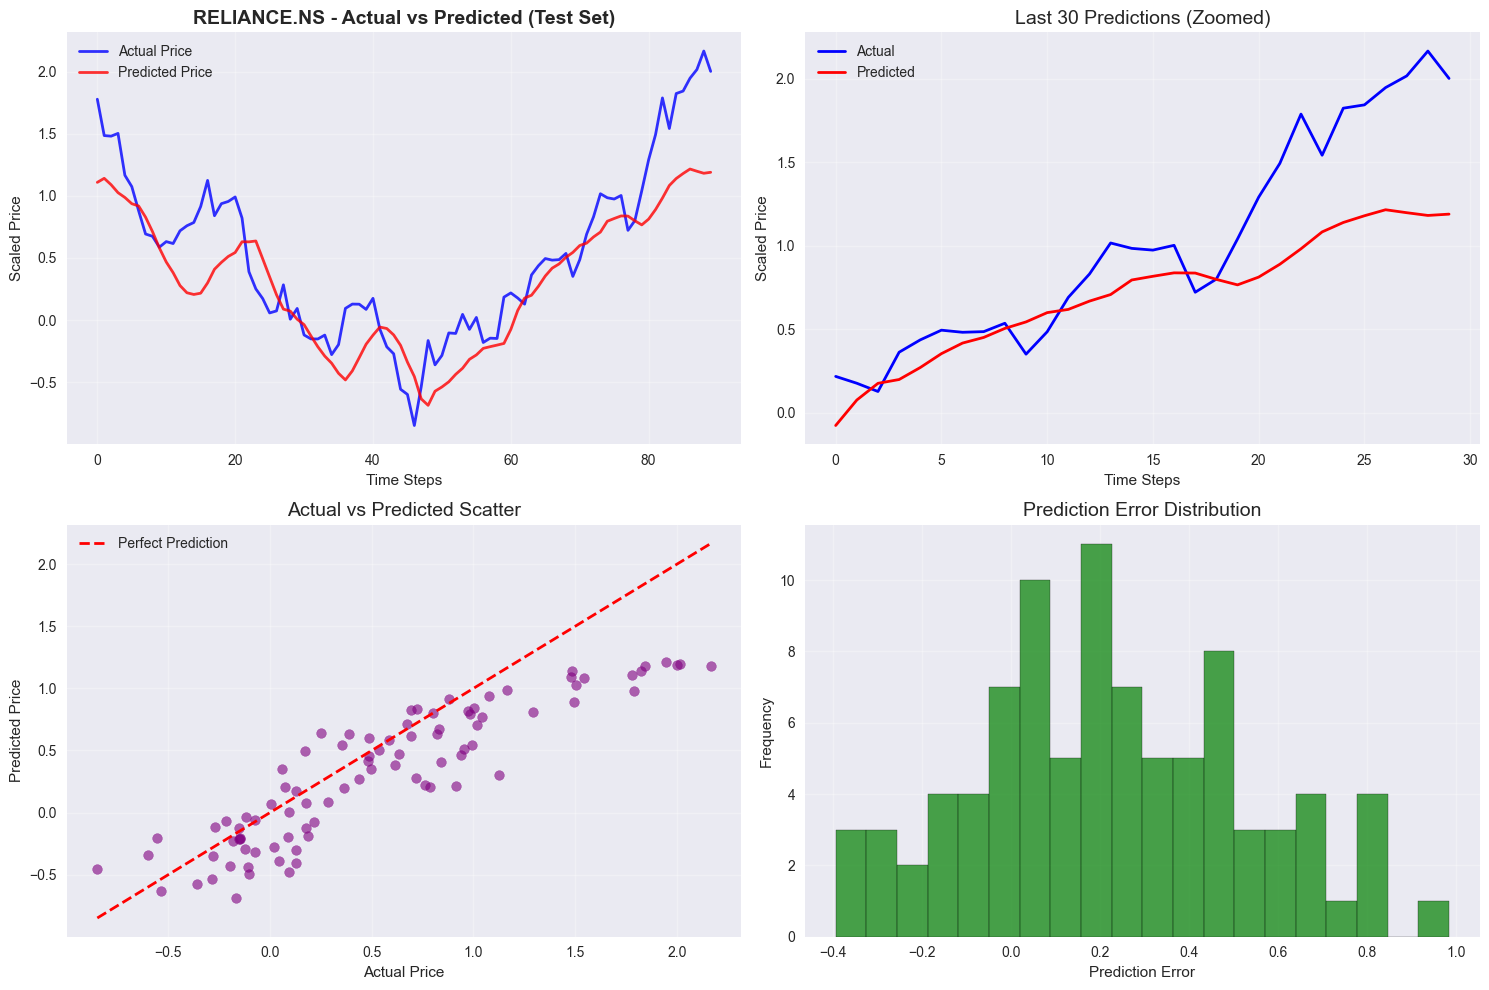


📈 PREDICTION SUMMARY:
🎯 R² Score: 0.6983
📊 MAPE: 118.08%
📉 Mean Error: 0.219384
📈 Std Error: 0.305201
👍 Good predictions! Room for improvement.

💡 How to read the plots:
📊 Top-left: Overall prediction vs actual over time
🔍 Top-right: Zoomed view of recent predictions
📈 Bottom-left: Scatter plot (closer to diagonal = better)
📉 Bottom-right: Error distribution (centered around 0 = better)


In [10]:
# 📊 Plot Predictions vs Actual Prices
print('📊 Creating prediction visualization...')

# Make predictions if not already done
model.eval()
with torch.no_grad():
    # Test predictions
    test_pred = model(X_test).cpu().numpy().flatten()
    test_actual = y_test.cpu().numpy().flatten()

# Create the plot
plt.figure(figsize=(15, 10))

# Main prediction plot
plt.subplot(2, 2, 1)
time_steps = range(len(test_actual))
plt.plot(time_steps, test_actual, label='Actual Price', linewidth=2, color='blue', alpha=0.8)
plt.plot(time_steps, test_pred, label='Predicted Price', linewidth=2, color='red', alpha=0.8)
plt.title(f'{STOCK_SYMBOL} - Actual vs Predicted (Test Set)', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom in on last 30 points for better detail
plt.subplot(2, 2, 2)
last_n = min(30, len(test_actual))
plt.plot(range(last_n), test_actual[-last_n:], label='Actual', linewidth=2, color='blue')
plt.plot(range(last_n), test_pred[-last_n:], label='Predicted', linewidth=2, color='red')
plt.title(f'Last {last_n} Predictions (Zoomed)', fontsize=14)
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot - Perfect predictions would be on the diagonal line
plt.subplot(2, 2, 3)
plt.scatter(test_actual, test_pred, alpha=0.6, color='purple')
plt.plot([test_actual.min(), test_actual.max()], [test_actual.min(), test_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Scatter', fontsize=14)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Error distribution
plt.subplot(2, 2, 4)
errors = test_actual - test_pred
plt.hist(errors, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Prediction Error Distribution', fontsize=14)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display R² score
r2 = r2_score(test_actual, test_pred)
mape = mean_absolute_percentage_error(test_actual, test_pred) * 100

print(f'\n📈 PREDICTION SUMMARY:')
print(f'🎯 R² Score: {r2:.4f}')
print(f'📊 MAPE: {mape:.2f}%')
print(f'📉 Mean Error: {np.mean(errors):.6f}')
print(f'📈 Std Error: {np.std(errors):.6f}')

if r2 > 0.7:
    print('✅ Great! Your model is making good predictions!')
elif r2 > 0.5:
    print('👍 Good predictions! Room for improvement.')
elif r2 > 0.3:
    print('⚠️ Fair predictions. Consider more training or features.')
else:
    print('❌ Poor predictions. Model needs improvement.')

print('\n💡 How to read the plots:')
print('📊 Top-left: Overall prediction vs actual over time')
print('🔍 Top-right: Zoomed view of recent predictions')
print('📈 Bottom-left: Scatter plot (closer to diagonal = better)')
print('📉 Bottom-right: Error distribution (centered around 0 = better)')